In [568]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pycountry import countries
%config InlineBackend.figure_format = 'retina'

gpd_df = gpd.read_file('data/WB_countries_Admin0.geojson')
temp_df = pd.read_csv('data/H_ERA5_world.csv')

In [569]:
temp_df = temp_df.transpose()
temp_df.columns = temp_df.iloc[0]
temp_df = temp_df.iloc[1:]
temp_df.reset_index(inplace=True)
temp_df.rename(columns={'index':'ISO_A2'}, inplace=True)

In [570]:
gpd_df.loc[50,'ISO_A2'] = "NO"
gpd_df.loc[20,'ISO_A2'] = "FR"

gpd_df = gpd_df.merge(temp_df, on='ISO_A2')
gpd_df = gpd_df.query("REGION_WB == 'Europe & Central Asia'")

(33.0, 72.0)

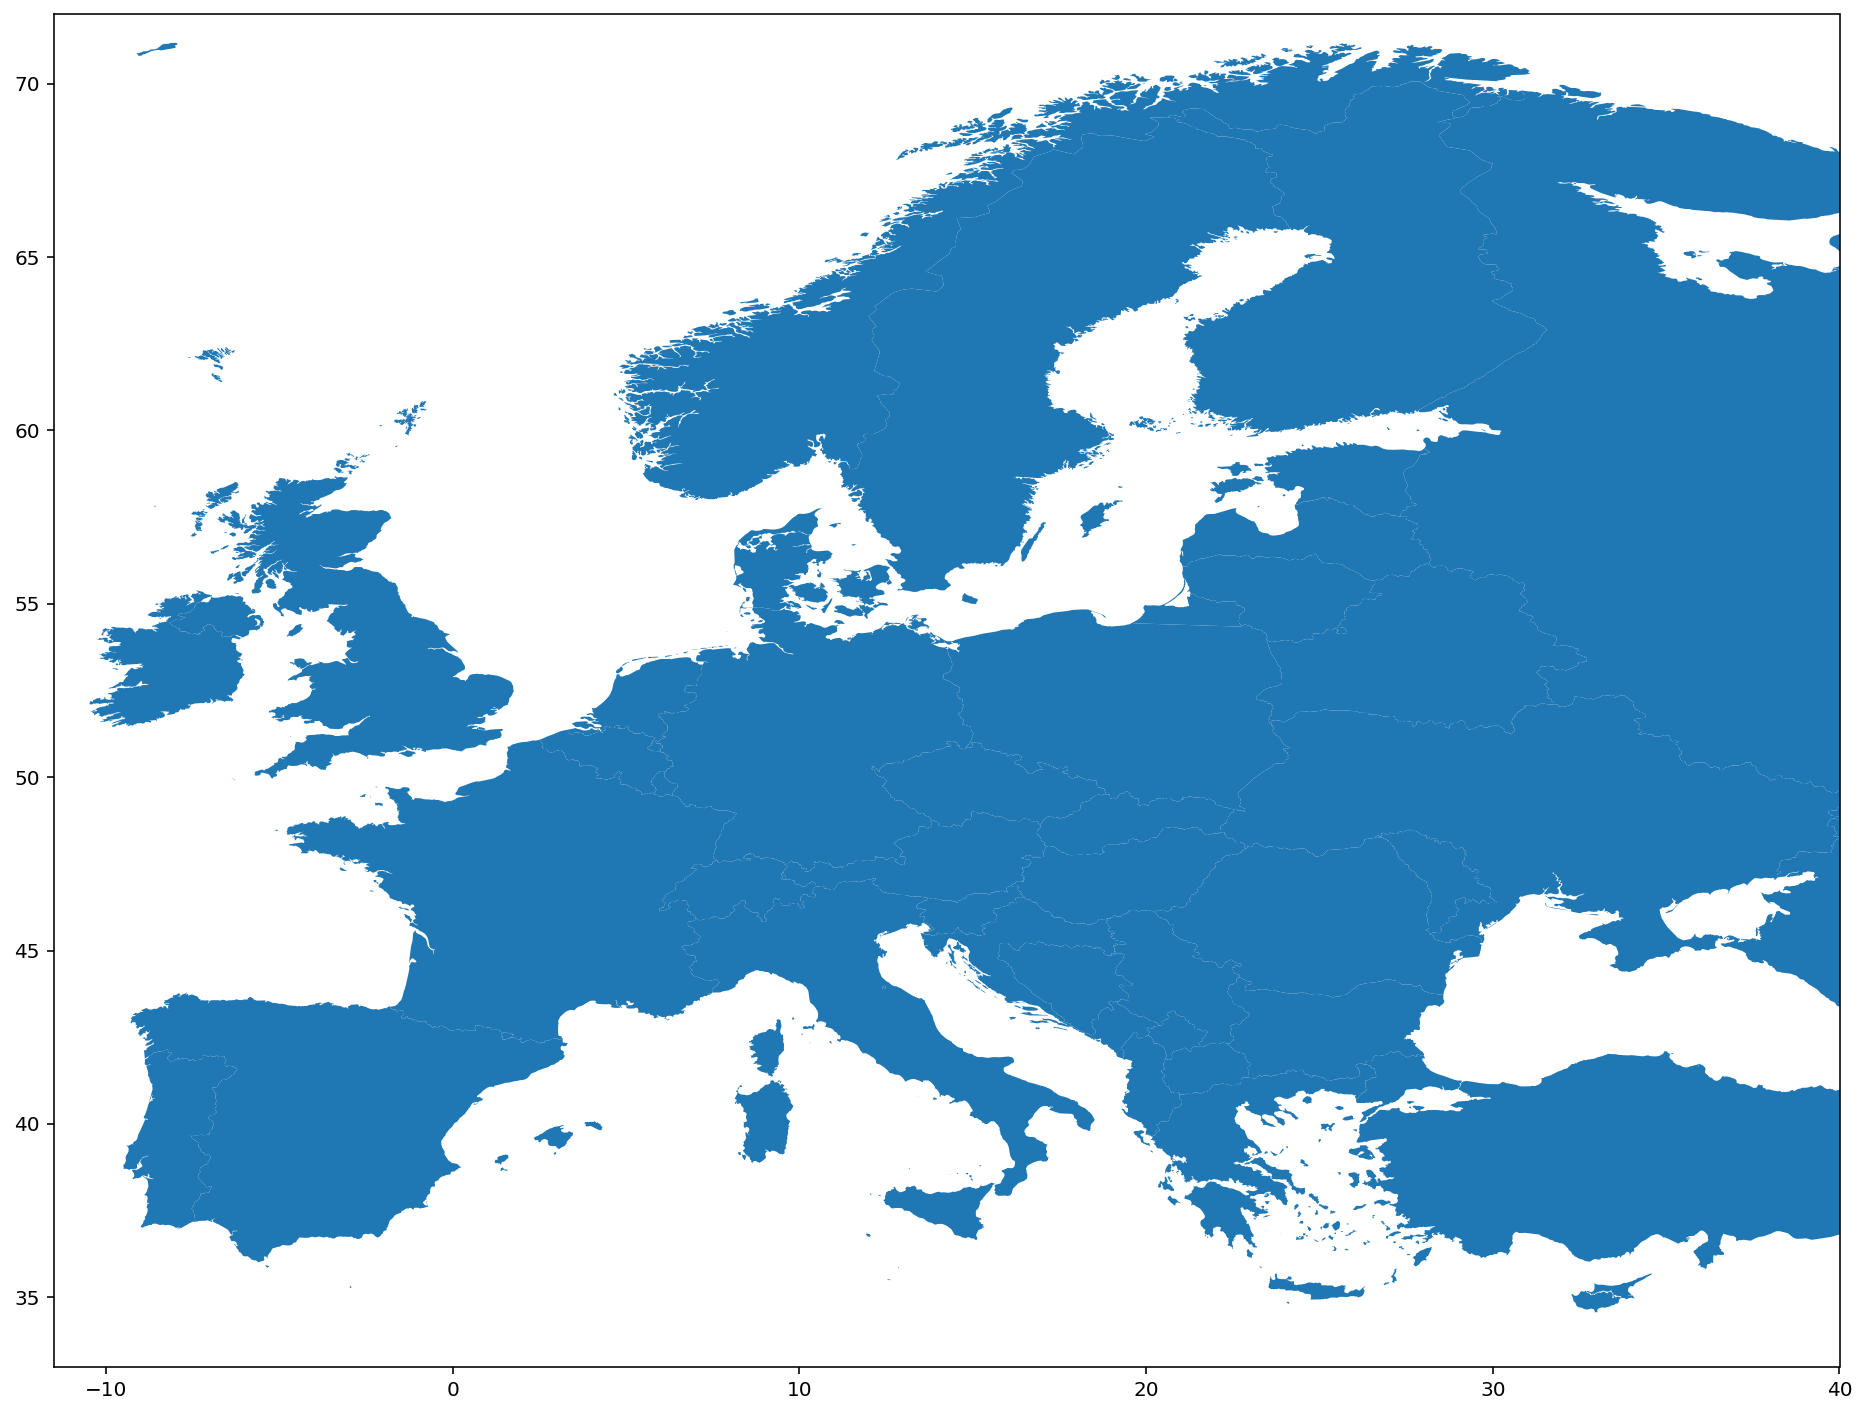

In [571]:
ax = gpd_df.plot(figsize=(16,16))
ax.set_xlim(-11.5,40)
ax.set_ylim(33,72)

In [572]:
years = ['1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
         '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
         '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
         '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
         '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
         '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
         '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
         '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
         '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
         '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
         '2019-12-31', '2020-12-31']

In [594]:
for year in years:
    ax = gpd_df.plot(column = year, figsize=(16,16),
                   cmap='coolwarm')
    ax.set_xlim(-11.5,40)
    ax.set_ylim(33,72)
    plt.savefig('img/'+year+'.png')
    plt.close()